In [1]:
import numpy as np
import pandas as pd
import cvxpy as cp
import networkx as nx
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['Times New Roman + SimSun + WFM Sans SC']
plt.rcParams['mathtext.fontset']='stix'
# Times New Roman + SimSun + WFM Sans SC
# simsum宋体, times new roman -*, simhei黑体, kaiti楷体, 
# dengxian等线, fangsong仿宋, Microsoft Yahei微软雅黑
plt.rcParams['axes.unicode_minus']=False   
plt.rcParams['figure.dpi'] = 200
# plt.rcParams['figure.figsize'] = [4, 3]
# plt.rcParams['font.size'] = 12
plt.rcParams['xtick.direction']='in'
plt.rcParams['ytick.direction']='in'

### 1

In [2]:
nodes_labels = ['v' + str(i) for i in range(1, 7)]
nodes_labels = dict(zip(range(1,7), nodes_labels))

L1 = [(1,2), (1,3), (1,4), (2,3), (2,6), (3,4), (4,5), (5,6)]
G1 = nx.Graph()
G1.add_edges_from(L1)

L2 = [(1,2,7), (1,3,3), (1,4,12), (2,3,1), (2,6,1), (3,4,8), (4,5,9), (5,6,3)]
G2 = nx.Graph()
G2.add_weighted_edges_from(L2)

L3 = [(2,1,7), (1,3,3), (4,1,12), (2,3,1), (6,2,1), (3,4,8), (5,4,9), (5,6,3)]
G3 = nx.DiGraph()
G3.add_weighted_edges_from(L3)

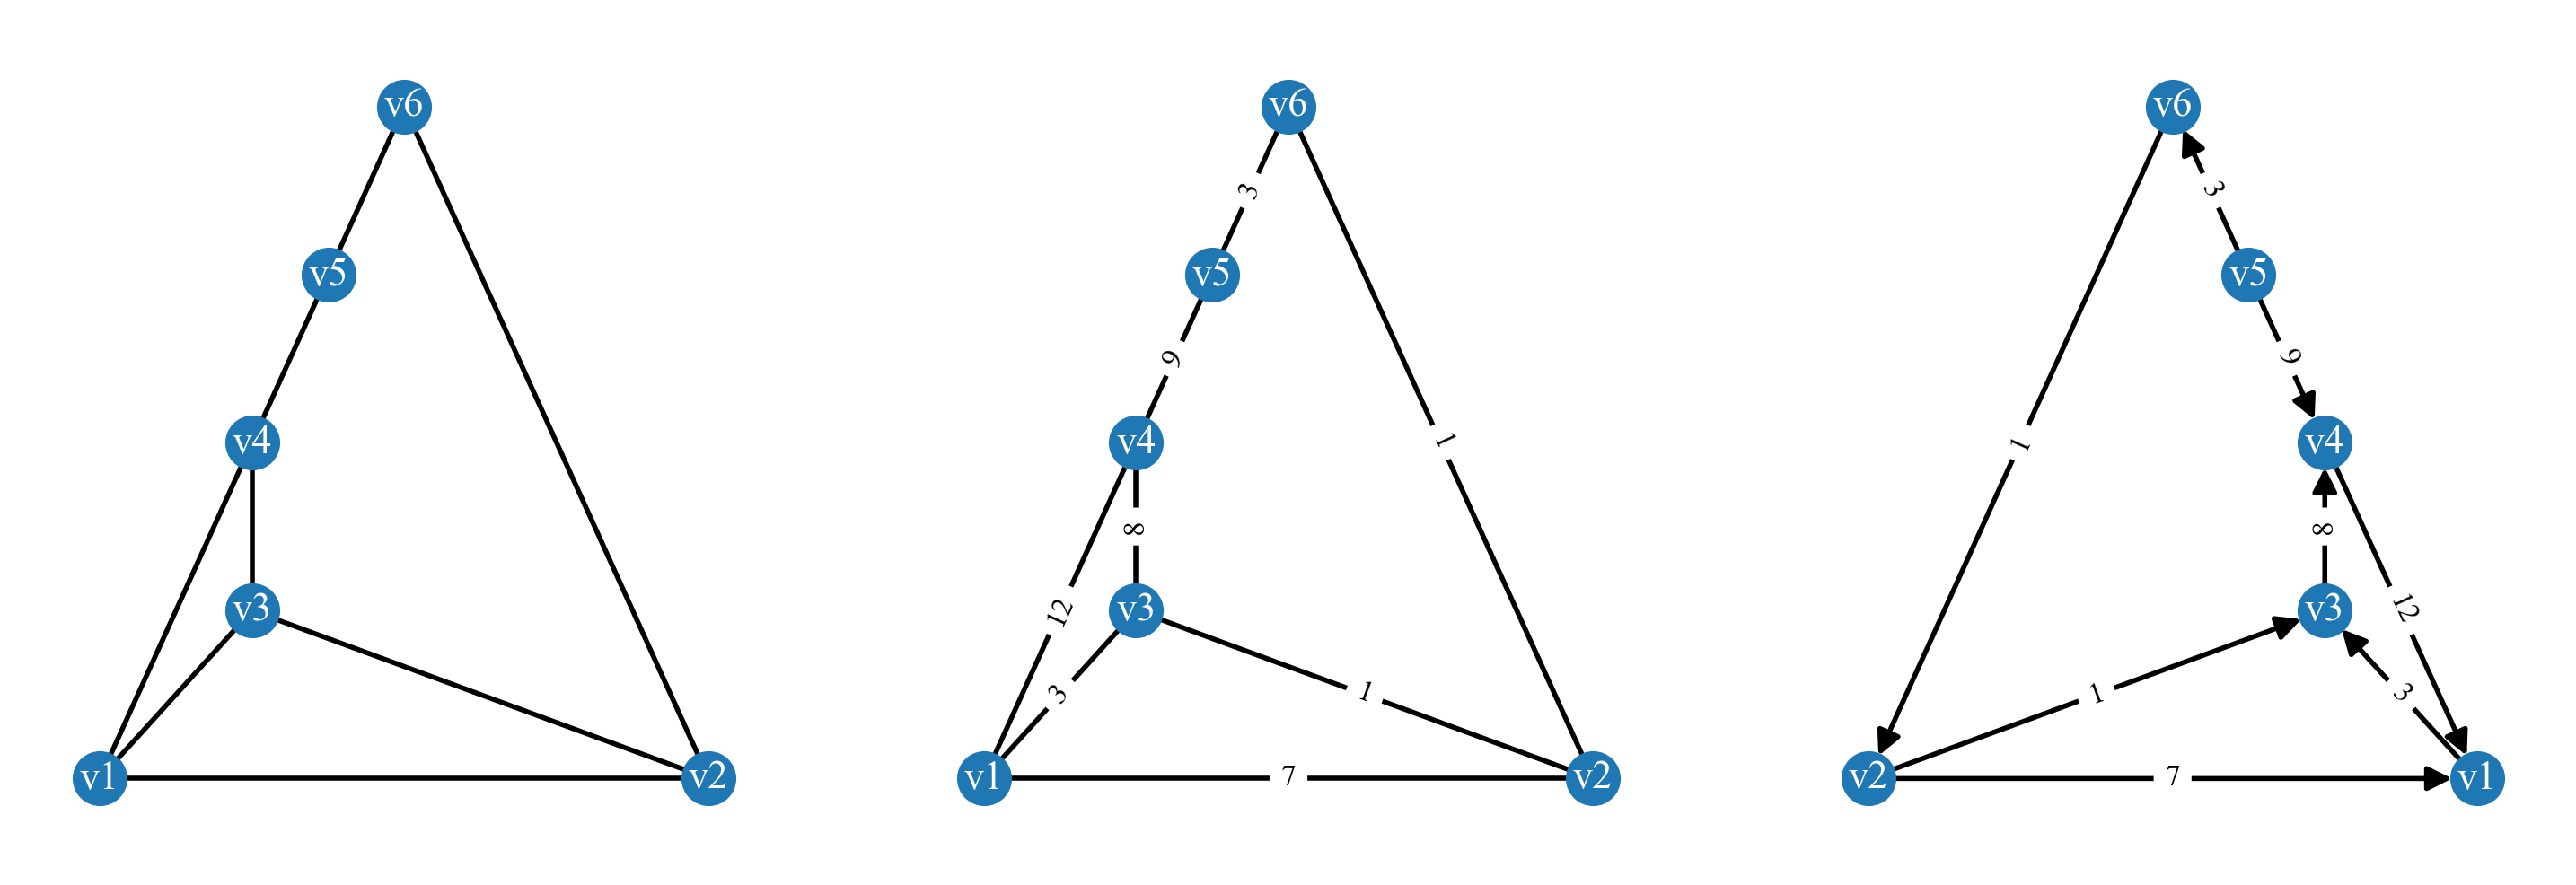

In [3]:
fig = plt.figure(dpi=400, figsize=(9,3))

ax = fig.add_subplot(131)
pos1 = nx.planar_layout(G1)
nx.draw(G1, pos1, labels=nodes_labels, with_labels='True', font_color='w', node_size=100, font_size=8)

ax1 = fig.add_subplot(132)
pos2 = nx.planar_layout(G2)
nx.draw(G2, pos2, labels=nodes_labels, with_labels='True', font_color='w', node_size=100, font_size=8)
edgelabels = nx.get_edge_attributes(G2, 'weight')
nx.draw_networkx_edge_labels(G2, pos2, edge_labels=edgelabels, font_size=6)

ax2 = fig.add_subplot(133)
pos3 = nx.planar_layout(G3)
nx.draw(G3, pos3, labels=nodes_labels, with_labels='True', font_color='w', node_size=100, font_size=8)
edgelabels = nx.get_edge_attributes(G3, 'weight')
nx.draw_networkx_edge_labels(G3, pos3, edge_labels=edgelabels, font_size=6)

fig.show()

### 2
最小生成树

In [4]:
df = pd.read_excel('../../../hw/06第6章  图论模型习题解答/ti6_2.xlsx', header=None)
dis = df.values
dis[np.isnan(dis)] = 0
dis = dis.astype(int)
print(dis)
G = nx.Graph(dis)
T = nx.minimum_spanning_tree(G)
w = nx.get_edge_attributes(T, 'weight')
print("最小生成树的长度为：", sum(w.values()))

[[ 0 56 35 21 51 60]
 [56  0 21 57 78 70]
 [35 21  0 36 68 68]
 [21 57 36  0 51 61]
 [51 78 68 51  0 13]
 [60 70 68 61 13  0]]
最小生成树的长度为： 141


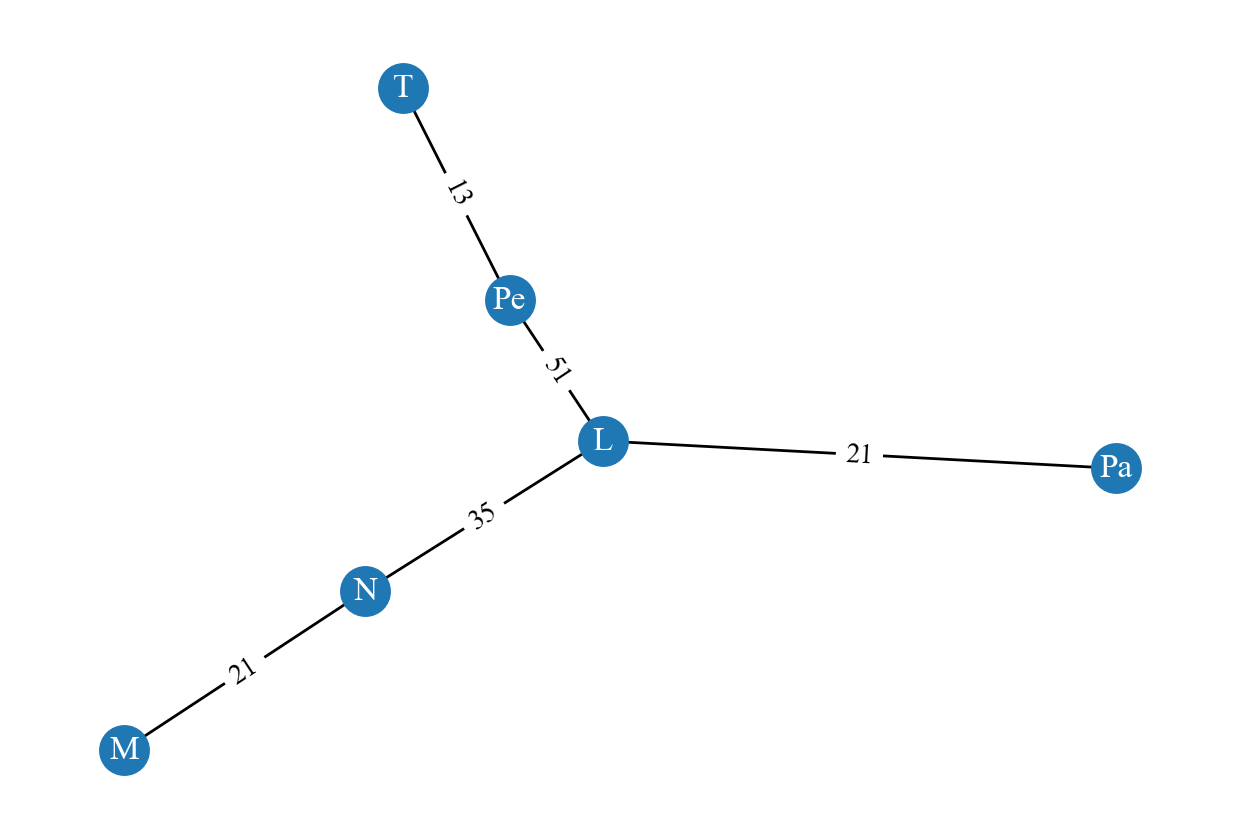

In [5]:
nodes_labels = ['L', 'M', 'N', 'Pa', 'Pe', 'T']
nodes_labels = dict(zip(range(6), nodes_labels))
pos = nx.spring_layout(T)
nx.draw(T, pos, with_labels=True, labels=nodes_labels, font_color='w')
nx.draw_networkx_edge_labels(T, pos, edge_labels=w)
plt.show()

### 3
最小生成树

In [6]:
L=[(1,2,20),(1,5,15),(2,3,20),(2,4,60),(2,5,25),
   (3,4,30),(3,5,18),(4,5,35),(4,6,10),(5,6,15)]
G = nx.Graph()
G.add_weighted_edges_from(L)
T = nx.minimum_spanning_tree(G)
w = nx.get_edge_attributes(T, 'weight')
print("最小生成树的长度为：", sum(w.values()))

最小生成树的长度为： 78


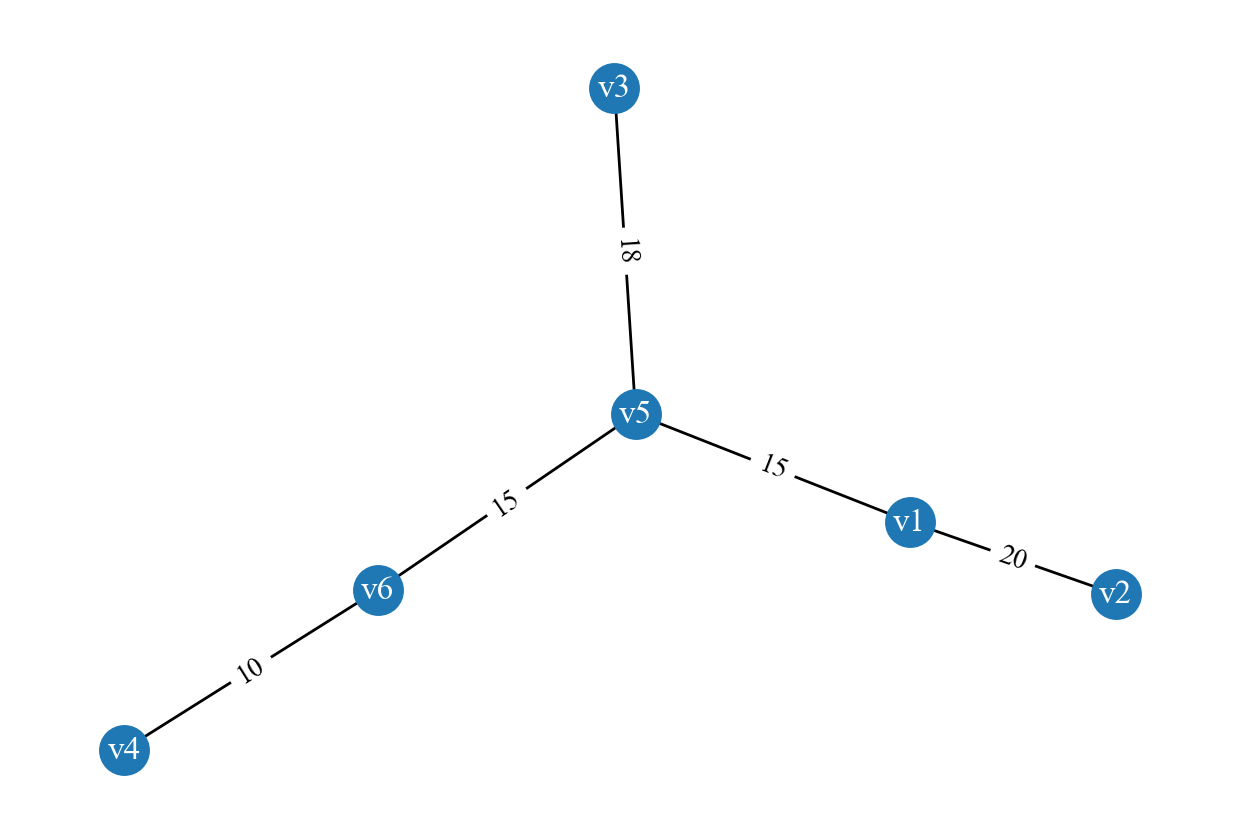

In [7]:
nodes_labels = ['v' + str(i) for i in range(1, 7)]
nodes_labels = dict(zip(range(1,7), nodes_labels))
pos = nx.spring_layout(T)
nx.draw(T, pos, with_labels=True, labels=nodes_labels, font_color='w')
nx.draw_networkx_edge_labels(T, pos, edge_labels=w)
plt.show()

### 4
允许售出的设备更新问题

In [8]:
price = np.array([2.5, 2.6, 2.8, 3.1])
sell = np.array([2.0, 1.6, 1.3, 1.1])
cost = np.array([0.3, 0.8, 1.5, 2.0])
cumsum_cost = np.cumsum(cost)
year_num = 4
W = np.zeros((year_num+1, year_num+1))
for i in range(year_num+1):
    W[i,i] = 0
for i in range(year_num+1):
    for j in range(i+1, year_num+1):
        W[i, j] = price[i] + cumsum_cost[j-i-1] - sell[j-i-1]
W

array([[0. , 0.8, 2. , 3.8, 6. ],
       [0. , 0. , 0.9, 2.1, 3.9],
       [0. , 0. , 0. , 1.1, 2.3],
       [0. , 0. , 0. , 0. , 1.4],
       [0. , 0. , 0. , 0. , 0. ]])

In [9]:
W[np.isinf(W)] = 0
G = nx.DiGraph(W)
path = nx.shortest_path(G, 0, year_num, weight='weight') 
dis = nx.shortest_path_length(G, 0, year_num, weight='weight')
print("应当在以下年份购置新设备", np.array(path[:-1]) + 1)
print("最少费用", round(dis,1))

应当在以下年份购置新设备 [1 2 3]
最少费用 4.0


### 5

In [10]:
n = 6
A=np.zeros((n,n))
A[0,[1,2]]=[2,7]
A[1,2:5]=[4,6,8]
A[2,[3,4]]=[1,3]
A[3,[4,5]]=[1,6]
A[4,5]=3
G = nx.Graph(A)
dis = nx.floyd_warshall_numpy(G)
dis_max = np.max(dis, axis=1)
hosp_loc = np.argmin(dis_max) + 1
hosp_loc

3

In [11]:
stu = np.array([50, 40, 60, 20, 70, 90])
stu_dis = stu@dis
scho_loc = np.argmin(stu_dis) + 1
scho_loc

4

### 6
PageRank 算法

In [12]:
import numpy as np
from scipy.sparse.linalg import eigs
W = np.loadtxt('../../../hw/06第6章  图论模型习题解答/ti6_6.txt')
W = W.T         # 出度越大，rank越高，与网页不同 (入度越大，rank越高)
W

array([[0., 0., 1., 0., 0., 0.],
       [1., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 1.],
       [1., 1., 1., 0., 0., 0.],
       [1., 1., 0., 1., 0., 0.],
       [1., 1., 0., 1., 1., 0.]])

[0.18677043 0.12451362 0.28015564 0.09338521 0.17509728 0.14007782]


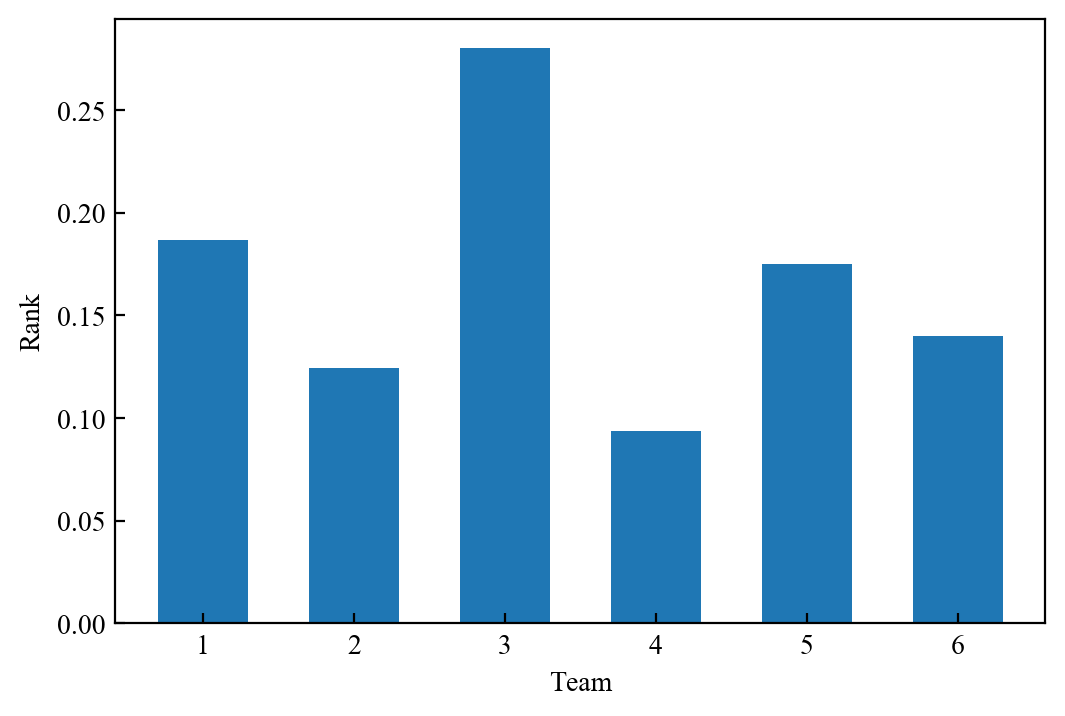

In [13]:
r = np.sum(W, axis=1, keepdims=True)
P = W/r
val, vec = eigs(P.T, 1)
V = vec.flatten()
V = V/sum(V)
V = V.real
print(V)

fig, ax = plt.subplots()
ax.bar(range(1, len(V)+1), V, width=0.6)
ax.set_xlabel('Team')
ax.set_ylabel('Rank')
fig.show()

### 7
无向图的度量图绘制

In [14]:
df = pd.read_excel('../../../hw/06第6章  图论模型习题解答/ti6_7.xlsx')
D = df.values
df

,顶点,x坐标,y坐标,顶点类别,相邻的顶点1,相邻的顶点2,相邻的顶点3
0,B,-1295.0,565.0,1.0,C,NaN,NaN
1,C,-1160.0,587.5,NaN,D,F,NaN
2,D,-1177.5,690.0,NaN,E,NaN,NaN
3,E,-1187.5,787.5,NaN,Q,NaN,NaN
4,F,-1092.5,357.5,NaN,G,U,NaN
...,...,...,...,...,...,...,...
90,N3,1285.0,22.5,NaN,O3,NaN,NaN
91,O3,1267.5,-180.0,NaN,NaN,NaN,NaN
92,P3,1115.0,-250.0,1.0,NaN,NaN,NaN
93,Q3,1362.5,672.5,NaN,R3,NaN,NaN


In [15]:
dots = D[:, 0]
xs = D[:, 1]
ys = D[:, 2]
types = D[:, 3].astype('float')
ind1 = np.where(types == 1)[0]
ind2 = np.where(types == 2)[0]
indnan = np.where(np.isnan(types))[0]
dot_num = len(dots)
W = np.zeros((dot_num, dot_num))

for i in range(dot_num):
    this_dot = D[i, 0]
    this_id = np.where(dots == this_dot)
    neighbour_dots = D[i, 4:7]
    for d in neighbour_dots:
        if d is not np.nan:
            neighbour_id = np.where(dots == d)
            W[this_id, neighbour_id] = 1
W += W.T
W

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.]])

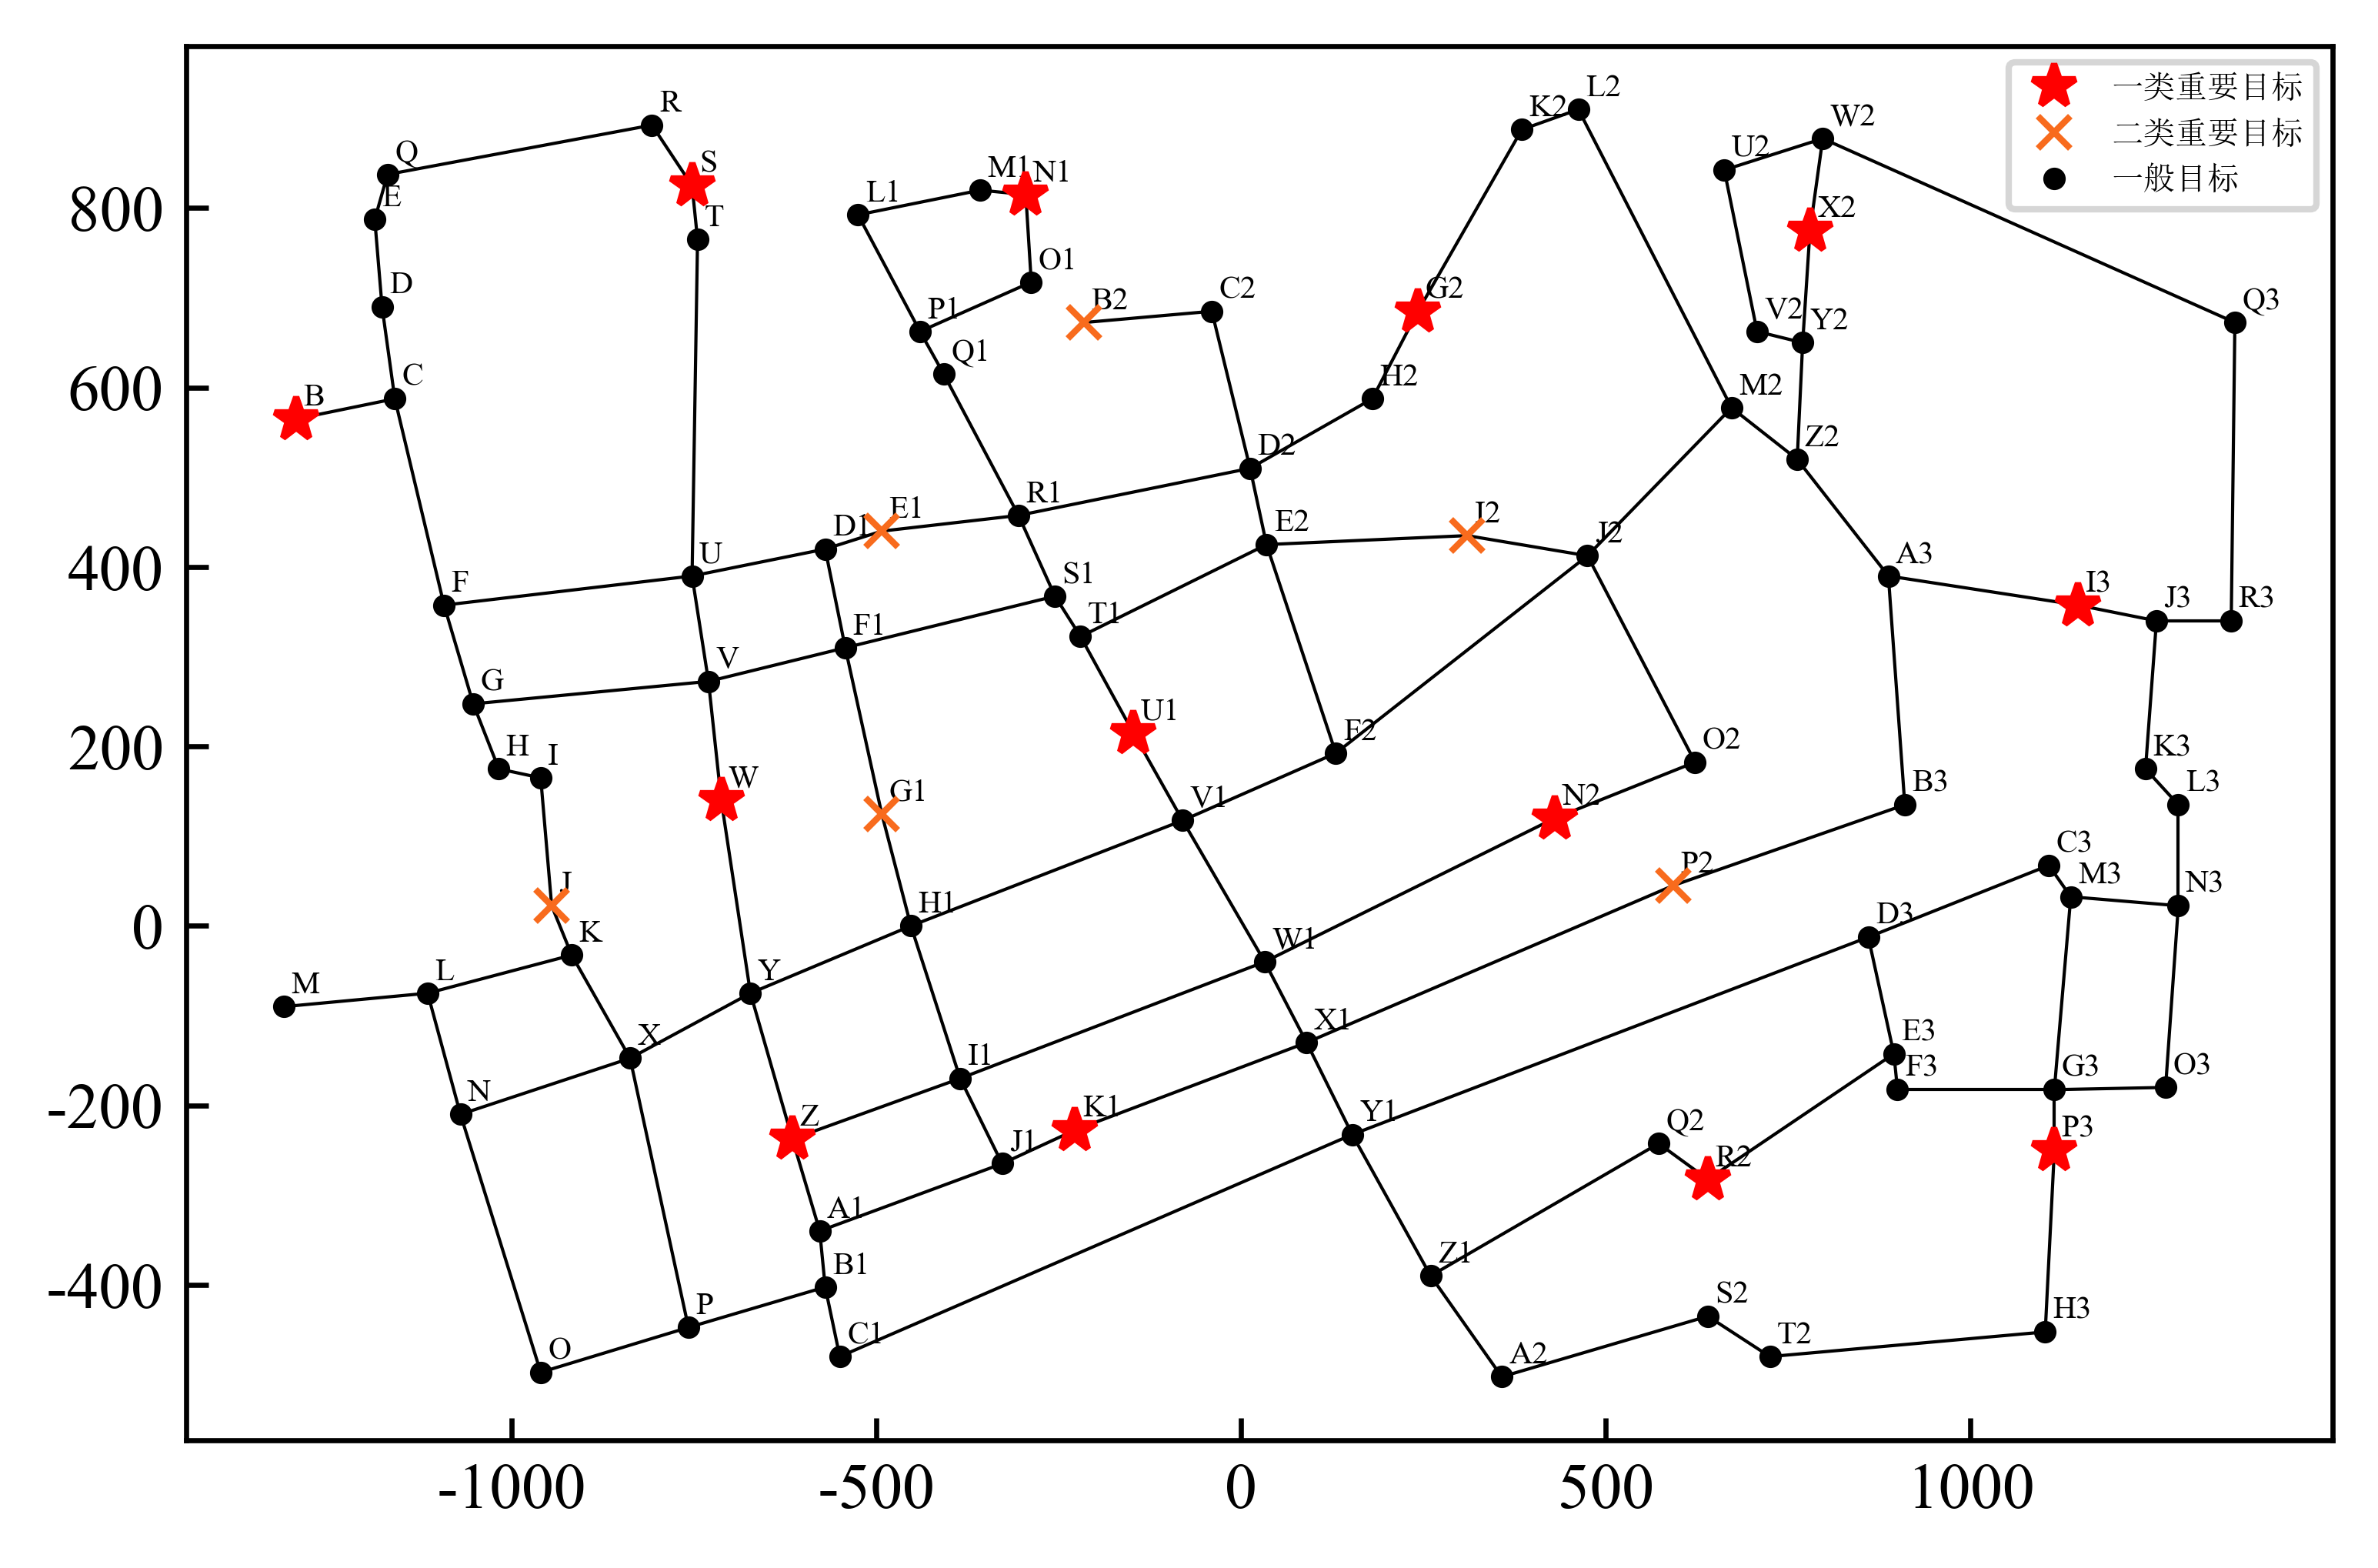

In [16]:
fig = plt.figure(dpi=600)
ax = fig.add_subplot(111)
ax.plot(xs[ind1], ys[ind1], '*', color='r', markersize=7, zorder=10, label='一类重要目标')
ax.plot(xs[ind2], ys[ind2], 'x', color='#f86b1d', markersize=5, zorder=10, label='二类重要目标')
ax.plot(xs[indnan], ys[indnan], '.k', markersize=5, zorder=10, label='一般目标')
for i in range(len(dots)):
    ax.text(xs[i]+10, ys[i]+15, dots[i], fontsize=5)
for i in range(dot_num):
    for j in range(i+1, dot_num):
        if W[i,j] != 0:
            ax.plot([xs[i], xs[j]], [ys[i], ys[j]], color='k', linewidth=0.5)
ax.legend(fontsize=5)
fig.show()

In [17]:
WW = []
for i in range(dot_num):
    for j in range(i+1, dot_num):
        if W[i,j] != 0:
            WW.append([i, j, np.sqrt((xs[i]-xs[j])**2 + (ys[i]-ys[j])**2)])
G = nx.Graph()
G.add_weighted_edges_from(WW)
T = nx.minimum_spanning_tree(G)
w = nx.get_edge_attributes(T, 'weight')
print("最小生成树的长度为：", sum(w.values()))

最小生成树的长度为： 14218.853564725914


In [18]:
np.array(G.nodes)

array([ 0,  1,  2,  4,  3, 15,  5, 19,  6, 20,  7,  8,  9, 10, 22, 11, 12,
       13, 14, 26, 16, 17, 18, 28, 21, 30, 23, 24, 32, 25, 33, 34, 27, 49,
       29, 42, 31, 43, 46, 47, 35, 48, 36, 37, 40, 38, 39, 41, 54, 44, 45,
       55, 56, 64, 66, 50, 80, 51, 67, 69, 52, 53, 58, 59, 60, 57, 61, 63,
       65, 62, 76, 78, 68, 81, 70, 84, 71, 72, 73, 75, 74, 93, 77, 85, 79,
       89, 82, 83, 91, 92, 86, 87, 94, 88, 90])

In [19]:
indL = np.where(dots=='L')[0][0]
indR3 = np.where(dots=='R3')[0][0]
path = nx.shortest_path(G, indL, indR3, weight='weight')
dis = nx.shortest_path_length(G, indL, indR3, weight='weight')
path_lb = dots[path]
print("最短路径为：", path_lb)
print("最短距离为：", dis)

最短路径为： ['L' 'K' 'X' 'Y' 'H1' 'V1' 'F2' 'J2' 'M2' 'Z2' 'A3' 'I3' 'J3' 'R3']
最短距离为： 2795.4679098753263


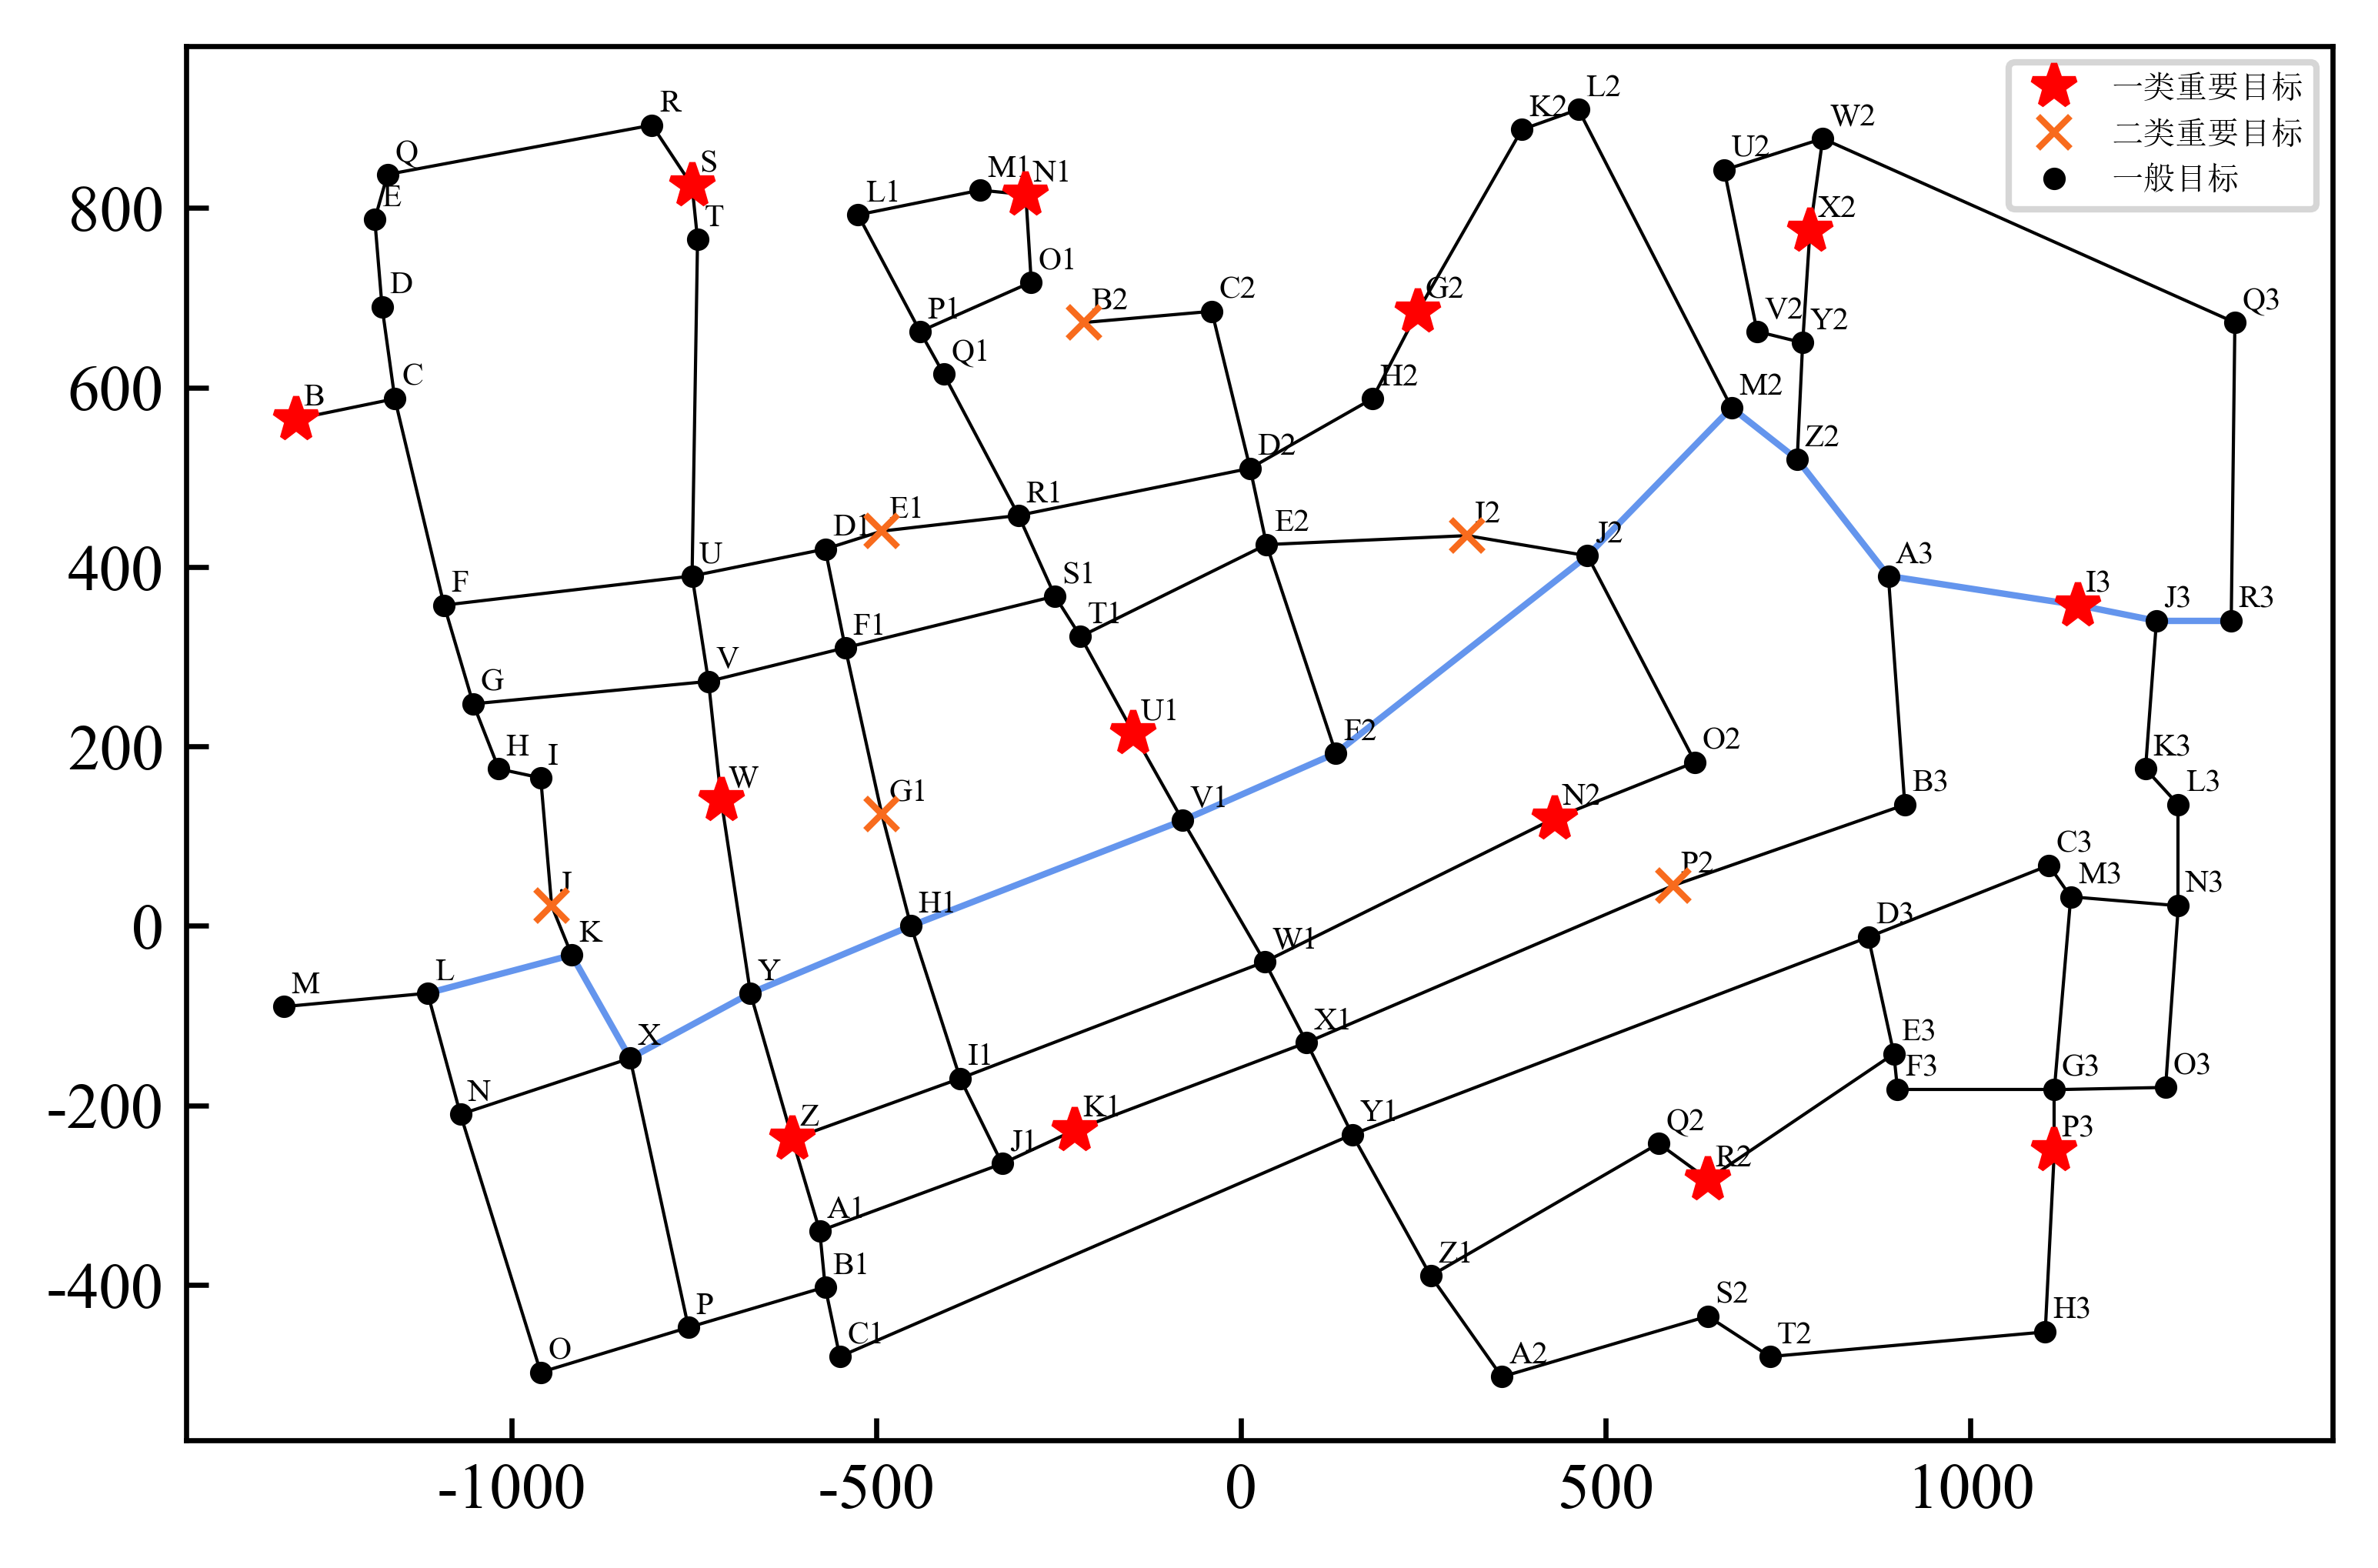

In [20]:
fig = plt.figure(dpi=600)
ax = fig.add_subplot(111)
ax.plot(xs[ind1], ys[ind1], '*', color='r', markersize=7, zorder=10, label='一类重要目标')
ax.plot(xs[ind2], ys[ind2], 'x', color='#f86b1d', markersize=5, zorder=10, label='二类重要目标')
ax.plot(xs[indnan], ys[indnan], '.k', markersize=5, zorder=10, label='一般目标')
for i in range(len(dots)):
    ax.text(xs[i]+10, ys[i]+15, dots[i], fontsize=5)
for i in range(dot_num):
    for j in range(i+1, dot_num):
        if W[i,j] != 0:
            ax.plot([xs[i], xs[j]], [ys[i], ys[j]], color='k', linewidth=0.5)
for i, j in zip(path[:-1], path[1:]):
    ax.plot([xs[i], xs[j]], [ys[i], ys[j]], color='cornflowerblue', linewidth=1)
ax.legend(fontsize=5)
fig.show()

### 8

In [21]:
import numpy.random as nr

nr.seed(114514)
flt = nr.rand(10,10)
itg = nr.randint(1, 11, (10, 10))
itg = np.tril(itg, -1)
W = (flt<0.6)*itg
W

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 9,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 8,  8,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 3,  0,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 3,  2,  7,  4,  0,  0,  0,  0,  0,  0],
       [ 0,  3,  1,  8,  0,  0,  0,  0,  0,  0],
       [ 7,  7,  5,  6,  7,  0,  7,  0,  0,  0],
       [ 0,  2,  2,  0,  0,  0,  0,  4,  0,  0],
       [10,  8,  8,  9, 10,  0,  0,  1, 10,  0]])

In [22]:
G = nx.Graph(W)
T = nx.minimum_spanning_tree(G)
w = nx.get_edge_attributes(T, 'weight')
print("最小生成树的长度为：", sum(w.values()))

最小生成树的长度为： 20


In [23]:
path = nx.shortest_path(G, 0, 9, weight='weight')
dis = nx.shortest_path_length(G, 0, 9, weight='weight')
print("最短路径为：", path)
print("最短距离为：", dis)

最短路径为： [0, 7, 9]
最短距离为： 8


In [24]:
print(nx.floyd_warshall_numpy(G))

[[ 0.  5.  4.  7.  3.  3.  5.  7.  6.  8.]
 [ 5.  0.  4.  6.  5.  2.  3.  6.  2.  7.]
 [ 4.  4.  0.  9.  1.  6.  1.  5.  2.  6.]
 [ 7.  6.  9.  0. 10.  4.  8.  6.  8.  7.]
 [ 3.  5.  1. 10.  0.  6.  2.  6.  3.  7.]
 [ 3.  2.  6.  4.  6.  0.  5.  8.  4.  9.]
 [ 5.  3.  1.  8.  2.  5.  0.  6.  3.  7.]
 [ 7.  6.  5.  6.  6.  8.  6.  0.  4.  1.]
 [ 6.  2.  2.  8.  3.  4.  3.  4.  0.  5.]
 [ 8.  7.  6.  7.  7.  9.  7.  1.  5.  0.]]


### 9
着色问题

In [25]:
L = np.loadtxt('../../../hw/06第6章  图论模型习题解答/ti6_9.txt').T.astype('int')
L

array([[1, 2],
       [1, 3],
       [1, 4],
       [2, 3],
       [2, 4],
       [2, 5],
       [3, 4],
       [3, 5]])

In [26]:
n = 5
W = np.zeros((n, n))
for l in L:
    i, j = l[0]-1, l[1]-1
    W[i,j] = W[j,i] = 1
K = int(np.max(np.sum(W, axis=1)))
W, K

(array([[0., 1., 1., 1., 0.],
        [1., 0., 1., 1., 1.],
        [1., 1., 0., 1., 1.],
        [1., 1., 1., 0., 0.],
        [0., 1., 1., 0., 0.]]),
 4)

In [27]:
x = cp.Variable((n, K+1), boolean=True)
y = cp.Variable(1, integer=True)
obj = cp.Minimize(y)
cons = [cp.sum(x, axis=1) == 1]

for i in range(n):
    for j in range(n):
        if W[i,j] == 1:
            for k in range(0, K+1):
                cons.append(x[i,k] + x[j,k] <= 1)
        
for i in range(n):
    cons.append(y >= range(1, K+2) @ x[i])

prob = cp.Problem(obj, cons)
prob.solve(solver='GUROBI')
print(f'最优解为：\n{x.value}'); print(f'需要考场的数目为：{prob.value}')
i, k = np.nonzero(x.value)
print("考生和考场的对应关系如下：")
print("考生:", i+1, sep='\t'); print("考场：", k+1, sep='\t')

最优解为：
[[0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]]
需要考场的数目为：4.0
考生和考场的对应关系如下：
考生:	[1 2 3 4 5]
考场：	[3 2 4 1 1]


### 10
最小费用最大流

In [28]:
L = [('vs','v1',4,10),('vs','v2',1,8),('v1','v3',6,2),('v1','vt',1,7),
    ('v2','v1',2,5),('v2','v3',3,10),('v3','vt',2,4)]
G = nx.DiGraph()
for i in range(len(L)):
    G.add_edge(L[i][0], L[i][1], weight=L[i][2], capacity=L[i][3])
flow_dict = nx.max_flow_min_cost(G, 'vs', 'vt')
min_cost = nx.cost_of_flow(G, flow_dict)
print('所求最大流为：',flow_dict)
print('最小费用为：', min_cost)

所求最大流为： {'vs': {'v1': 3, 'v2': 8}, 'v1': {'v3': 0, 'vt': 7}, 'v2': {'v1': 4, 'v3': 4}, 'v3': {'vt': 4}, 'vt': {}}
最小费用为： 55


In [29]:
node = list(G.nodes())  #导出顶点列表
n = len(node)
flow_mat=np.zeros((n,n))
for i, adj in flow_dict.items():
    for j, f in adj.items():
        flow_mat[node.index(i),node.index(j)] = f
print('最大流的流量为：', sum(flow_mat[:,-1]))
print('最小费用最大流的邻接矩阵为：\n', flow_mat)

最大流的流量为： 11.0
最小费用最大流的邻接矩阵为：
 [[0. 3. 8. 0. 0.]
 [0. 0. 0. 0. 7.]
 [0. 4. 0. 4. 0.]
 [0. 0. 0. 0. 4.]
 [0. 0. 0. 0. 0.]]


### 11
计划网络图

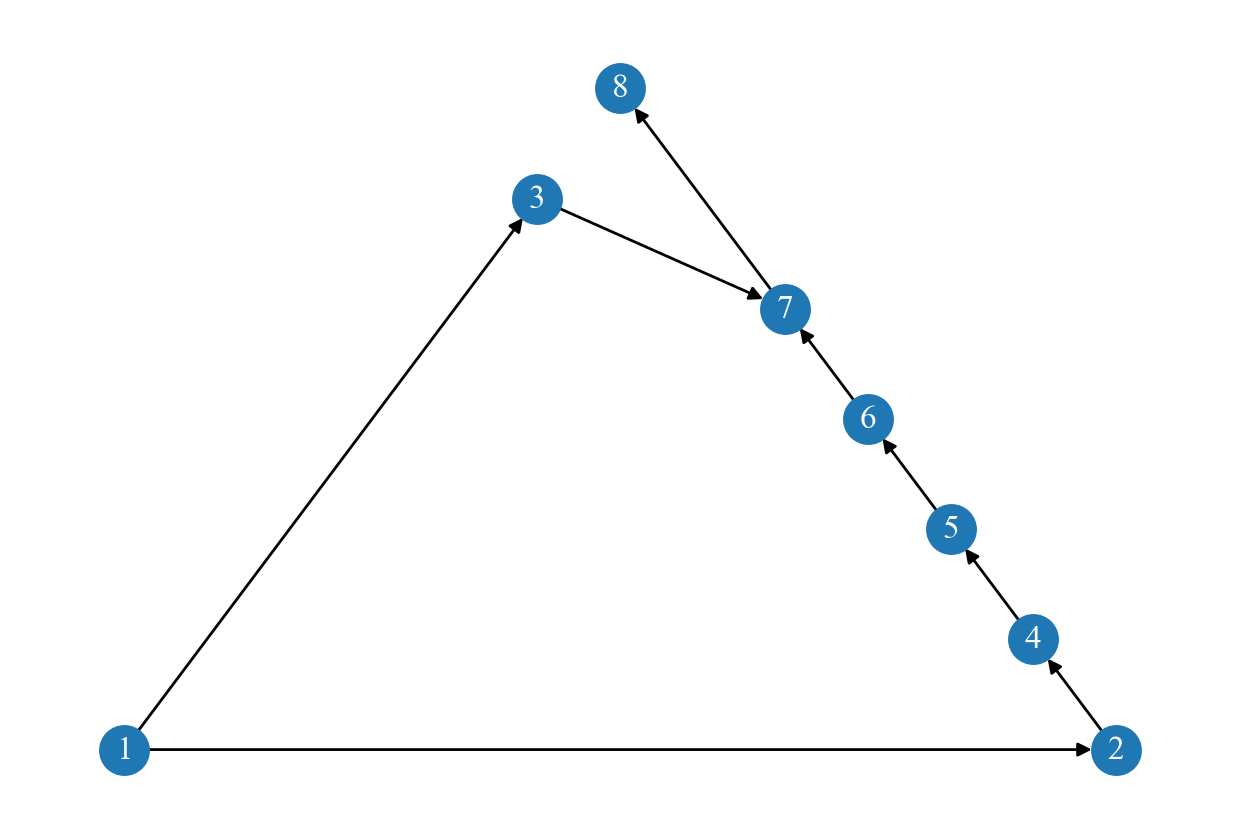

In [30]:
n = 8
L = np.array([(1,2,6,4,800,2,6,10),(1,3,5,3,600,4,5,6),
    (2,4,3,1,300,2,3,4),(3,7,2,1,300,3,4,5),(4,5,2,1,600,1,2,3),
    (5,6,3,1,400,1,3,5),(6,7,4,2,200,2,4,6),(7,8,2,2,200,1,2,4)])
    # 0事件，1事件，2计划完成时间，3最短完成时间，4缩短一周费用，5a, 6b, 7c
G = nx.DiGraph()
G.add_nodes_from(range(1,n+1))
G.add_edges_from(L[:, 0:2])
nx.draw(G, pos=nx.planar_layout(G), with_labels=True, font_color='w')

In [31]:
n = 8
x = cp.Variable(n, nonneg=True)
obj = cp.Minimize(cp.sum(x))    # 为了求所有事件的最早开工时间，把目标函数取为 cp.sum(x)而不是 x[-1]
cons = []
for k in range(len(L)):
    i, j, t = L[k][0:3]
    cons.append(x[j-1] >= x[i-1] + t)
prob = cp.Problem(obj, cons)
prob.solve(solver='GUROBI')

xx = x.value
z = np.zeros(n)
z[-1] = xx[-1]
for i in range(n-1, 0, -1):
    z[i-1] = min(z[l[1]-1] - l[2] for l in L if l[0] == i)
es, lf, ls, ef = [], [], [], []
for k in range(len(L)):
    i, j, t = L[k][0]-1, L[k][1]-1, L[k][2]
    es.append([(i+1, j+1), xx[i]])
    lf.append([(i+1, j+1), z[j]])
    ls.append([(i+1, j+1), z[j] - t])
    ef.append([(i+1, j+1), xx[i] + t])

es, ls, ef, lf = np.array(es, dtype=object), np.array(ls, dtype=object), np.array(ef, dtype=object), np.array(lf, dtype=object)
data = np.vstack([es[:,1], ls[:,1], ef[:,1], lf[:,1]]).T
df = pd.DataFrame(data, index=es[:,0], columns=['最早开工时间', '最晚开工时间', '最早完工时间', '最晚完工时间'])
print("整个项目的最短工期：", x.value[-1])
print("关键路径为：", np.array(df[df['最早开工时间'] == df['最晚开工时间']].index))
df

整个项目的最短工期： 20.0
关键路径为： [(1, 2) (2, 4) (4, 5) (5, 6) (6, 7) (7, 8)]


,最早开工时间,最晚开工时间,最早完工时间,最晚完工时间
"(1, 2)",0.0,0.0,6.0,6.0
"(1, 3)",0.0,11.0,5.0,16.0
"(2, 4)",6.0,6.0,9.0,9.0
"(3, 7)",5.0,16.0,7.0,18.0
"(4, 5)",9.0,9.0,11.0,11.0
"(5, 6)",11.0,11.0,14.0,14.0
"(6, 7)",14.0,14.0,18.0,18.0
"(7, 8)",18.0,18.0,20.0,20.0


In [32]:
d = 17
x = cp.Variable(8, nonneg=True)
y = cp.Variable((8,8), integer=True)
fun = 0
for k in range(len(L)):
    i, j, c = L[k][0]-1, L[k][1]-1, L[k][4]
    fun += c*y[i,j]
obj = cp.Minimize(fun)
cons = [
    x[-1] - x[0] <= d, 
    y >= 0
]
for k in range(len(L)):
    i, j, t, m = L[k][0]-1, L[k][1]-1, L[k][2], L[k][3]
    cons.append(x[j] - x[i] >= t - y[i,j])
    cons.append(y[i,j] <= t - m)
prob = cp.Problem(obj, cons)
prob.solve(solver='GLPK_MI')
print("最小费用为：", prob.value)
print("x 的取值为：\n", x.value)
print("y 的取值为：\n", y.value)
ni, nj = np.nonzero(y.value)
print("压缩工期的作业为：", ni+1, nj+1, sep='\n')

最小费用为： 700.0
x 的取值为：
 [-0.  6.  5.  8. 10. 13. 15. 17.]
y 的取值为：
 [[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 2. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]
压缩工期的作业为：
[2 6]
[4 7]


In [33]:
aa, mm, bb = L[:,5], L[:,6], L[:,7]
Et = (aa + 4*mm + bb)/6
Vt = (bb - aa)**2/36

n = 8
x = cp.Variable((n,n), boolean=True)    # x_ij 是否在关键路径上
fun = 0
for k in range(len(L)):
    i, j = L[k][0]-1, L[k][1]-1
    fun += Et[k]*x[i,j]
obj = cp.Maximize(fun)
out = [l[1]-1 for l in L if l[0] == 1]
inn = [l[0]-1 for l in L if l[1] == n]
cons = [
    cp.sum(x[0, out]) == 1,
    cp.sum(x[inn, n-1]) == 1,
]
for k in range(2, n):   # 不妨用 k表示自然序列 (1,2,...,n)的循环变量，而用 i表示机器序列的循环变量
    out = [l[1]-1 for l in L if l[0] == k]
    inn = [l[0]-1 for l in L if l[1] == k]
    cons.append(cp.sum(x[k-1, out]) - cp.sum(x[inn, k-1]) == 0)
prob = cp.Problem(obj, cons)
prob.solve(solver='GUROBI')
print('工期的数学期望为：', prob.value); print('关键路径为:\n', x.value)

from scipy.stats import norm
xx, f = x.value, prob.value
d = 21
s2 = 0
for k in range(len(L)):
    i, j = L[k][0]-1, L[k][1]-1
    s2 += xx[i,j]*Vt[k]
s = np.sqrt(s2)
p = norm.cdf(d, f, s)       # 累计分布函数
N = norm.ppf(0.95)*s + f    # cdf的逆
print('标准差s:\t\t', s)
print('概率p:\t\t', p)
print('需要天数N：\t', N)

工期的数学期望为： 20.166666666666668
关键路径为:
 [[0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]
标准差s:		 1.7716909687891083
概率p:		 0.6809512365307461
需要天数N：	 23.0808389825166
